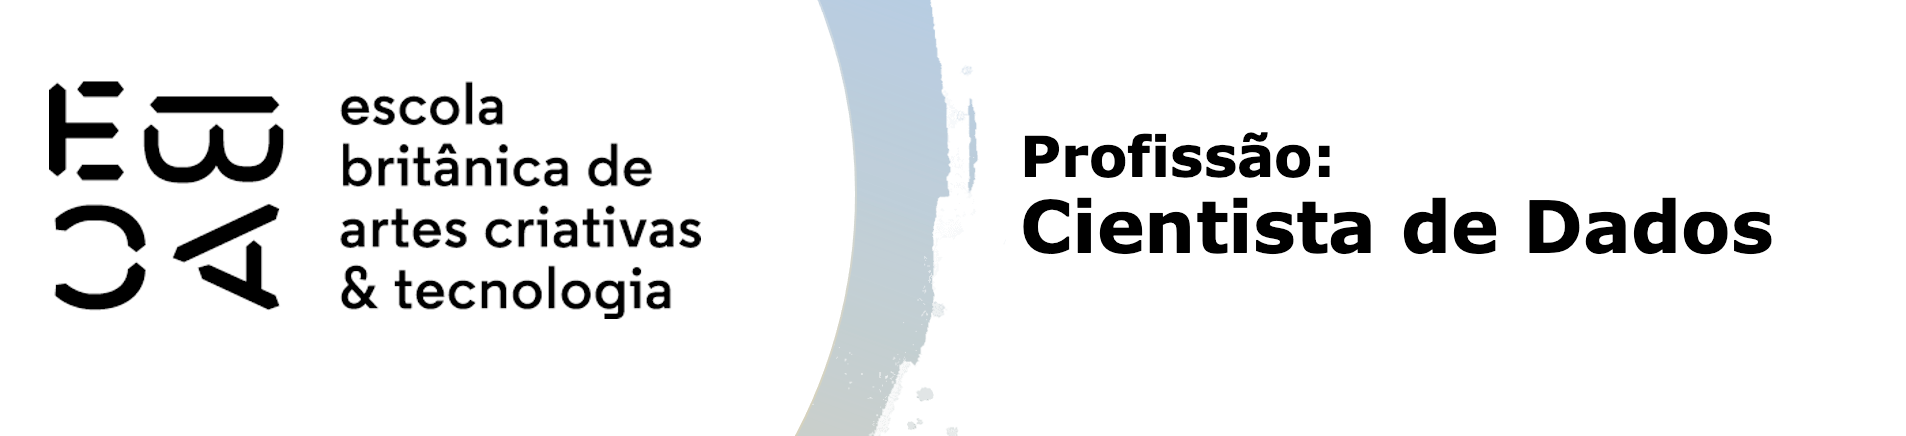

# Regressão III - Tarefa

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

%reload_ext watermark
%watermark -iv -v

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.15.0

pandas     : 2.1.4
matplotlib : 3.8.2
statsmodels: 0.14.0
numpy      : 1.26.2
seaborn    : 0.13.0



In [2]:
df = pd.read_csv('./Dados/previsao_de_renda_II.csv', index_col=0)
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [3]:
df.isna().sum()

index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64

In [4]:
df.fillna(df['tempo_emprego'].mean(), inplace=True)

In [5]:
df.isna().sum()

index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [6]:
df.reset_index(names='data',inplace=True)
df.head()

,data,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [205]:
df['renda_log'] = np.log(df['renda'])

In [206]:
meses_test = df['data'].unique()[-3:]

df_test = df[df.data.isin(meses_test)]
df_train = df[~df.data.isin(meses_test)]

In [207]:
df_test.data.unique()

array(['2016-01-01', '2016-02-01', '2016-03-01'], dtype=object)

In [208]:
df_train.data.unique()

array(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
       '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
       '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01'],
      dtype=object)

### Primeiro modelo
 Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$

In [40]:
import patsy

In [56]:
X1 = patsy.dmatrices('np.log(renda) ~ idade', df_train)
X1

(DesignMatrix with shape (600000, 1)
   np.log(renda)
         9.31813
         7.79351
         9.52877
         7.76720
         6.67302
         7.52158
         9.55837
         7.59139
         8.96268
         9.28573
         7.97363
         8.07169
         7.64812
         9.39509
         7.75868
        10.63772
         8.08485
         8.97967
         7.68548
         6.88726
         8.60322
         6.94949
         7.89902
        10.42734
         8.94639
         7.41862
         8.33483
         8.54145
         8.52262
        10.76323
   [599970 rows omitted]
   Terms:
     'np.log(renda)' (column 0)
   (to view full data, use np.asarray(this_obj)),
 DesignMatrix with shape (600000, 2)
   Intercept  idade
           1     47
           1     30
           1     28
           1     44
           1     33
           1     56
           1     41
           1     52
           1     50
           1     55
           1     66
           1     28
           1     61
  

In [209]:
Analise = pd.DataFrame(df.dtypes, columns=['Dtypes']).assign(Missing = df.isna().sum(),
                                                             Valores_Unicos = df.nunique())

Analise

,Dtypes,Missing,Valores_Unicos
data,object,0,15
index,int64,0,16650
sexo,object,0,2
posse_de_veiculo,object,0,2
posse_de_imovel,object,0,2
qtd_filhos,int64,0,8
tipo_renda,object,0,5
educacao,object,0,5
estado_civil,object,0,5
tipo_residencia,object,0,6


In [210]:
X1 = '''renda_log ~ C(sexo)
                        + C(posse_de_veiculo)
                        + C(posse_de_imovel)
                        + qtd_filhos
                        + C(tipo_renda)
                        + C(educacao)
                        + C(estado_civil)
                        + C(tipo_residencia)
                        + idade
                        + tempo_emprego
                        + qt_pessoas_residencia'''

res = smf.ols(X1, data=df_train).fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              renda_log   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                 1.947e+04
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:26:57   Log-Likelihood:            -7.9748e+05
No. Observations:              600000   AIC:                         1.595e+06
Df Residuals:                  599975   BIC:                         1.595e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               7.6405      0.048    160.310      0.000       7.547       7.734
C(sexo)[T.M]                            0.1354      0.003     48.568      0.000       0.130       0.141
C(posse_de_veiculo)[T.S]                0.0055      0.003      2.087      0.037       0.000       0.011
C(posse_de_imovel)[T.S]                 0.1852      0.003     71.417      0.000       0.180       0.190
C(tipo_renda)[T.Bolsista]              -0.2166      0.052     -4.129      0.000      -0.319      -0.114
C(tipo_renda)[T.Empresário]             0.1452      0.003     48.527      0.000       0.139       0.151
C(tipo_renda)[T.Pensionista]           -0.2974      0.004    -69.709      0.000      -0.306      -0.289
C(tipo_renda)[T.Servidor público]       0.1333      0.004     30.253      0.000       0.125       0.142
C(educacao)[T.Médio]                    0.0301      0.011      2.689      0.007       0.008       0.052
C(educacao)[T.Pós graduação]            0.1542      0.038      4.043      0.000       0.079       0.229
C(educacao)[T.Superior completo]        0.1233      0.011     10.896      0.000       0.101       0.146
C(educacao)[T.Superior incompleto]      0.0434      0.013      3.424      0.001       0.019       0.068
C(estado_civil)[T.Separado]             0.1793      0.023      7.792      0.000       0.134       0.224
C(estado_civil)[T.Solteiro]             0.1614      0.023      7.151      0.000       0.117       0.206
C(estado_civil)[T.União]                0.0097      0.005      2.161      0.031       0.001       0.019
C(estado_civil)[T.Viúvo]                0.1634      0.023      7.027      0.000       0.118       0.209
C(tipo_residencia)[T.Casa]             -0.0881      0.010     -8.651      0.000      -0.108      -0.068
C(tipo_residencia)[T.Com os pais]      -0.0557      0.012     -4.823      0.000      -0.078      -0.033
C(tipo_residencia)[T.Comunitário]      -0.1404      0.021     -6.835      0.000      -0.181      -0.100
C(tipo_residencia)[T.Estúdio]          -0.1408      0.017     -8.203      0.000      -0.174      -0.107
C(tipo_residencia)[T.Governamental]    -0.0942      0.012     -7.773      0.000      -0.118      -0.070
qtd_filhos                             -0.1498      0.022     -6.668      0.000      -0.194      -0.106
idade                                   0.0042      0.000     26.893      0.000       0.004       0.004
tempo_emprego                           0.1290      0.000    619.711      0.000       0.129       0.129
qt_pessoas_residencia                   0.1554      0.022      6.929      0.000       0.111       0.199
==============================================================================
Omnibus:                     1088.041   Durbin-Watson:                   1.234
Prob(Omnibus)

In [211]:
df_train

,data,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,renda_log
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14,9.318131
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81,7.793508
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66,9.528769
3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84,7.767196
4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78,6.673020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,2015-12-01,4650,F,N,S,1,Assalariado,Superior incompleto,Solteiro,Casa,37,4.441096,2.0,1893.35,7.546103
599996,2015-12-01,9717,M,S,S,0,Empresário,Médio,Casado,Estúdio,44,2.345205,2.0,3080.48,8.032841
599997,2015-12-01,7485,M,S,S,0,Assalariado,Médio,Casado,Casa,28,0.736986,2.0,5131.20,8.543095
599998,2015-12-01,15500,F,S,S,1,Empresário,Superior completo,Solteiro,Casa,27,6.791781,2.0,20449.25,9.925701


In [215]:
res.get_prediction().summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,10.624447,0.004635,10.615364,10.633531,8.832769,12.416126
1,9.410457,0.006786,9.397156,9.423758,7.618752,11.202162
2,9.302597,0.004187,9.294392,9.310803,7.510923,11.094271
3,8.575848,0.004344,8.567333,8.584363,6.784172,10.367523
4,8.481865,0.004083,8.473863,8.489867,6.690191,10.273538
...,...,...,...,...,...,...
599995,8.830005,0.007109,8.816071,8.843939,7.038296,10.621715
599996,8.797492,0.014304,8.769455,8.825528,7.005617,10.589366
599997,8.430965,0.003848,8.423423,8.438506,6.639293,10.222636
599998,9.322336,0.005150,9.312242,9.332430,7.530652,11.114020


In [236]:
X1 = 'renda_log ~ np.log(tempo_emprego)'

res = smf.ols(X1, data=df_train).fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              renda_log   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                 2.345e+05
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:42:10   Log-Likelihood:            -8.7125e+05
No. Observations:              600000   AIC:                         1.743e+06
Df Residuals:                  599998   BIC:                         1.743e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 8.0877      0.003   2891.141      0.000       8.082       8.093
np.log(tempo_emprego)     0.6964      0.001    484.293      0.000       0.694       0.699
==============================================================================
Omnibus:                     2888.108   Durbin-Watson:                   1.407
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2976.121
Skew:                           0.158   Prob(JB):                         0.00
Kurtosis:                       3.137   Cond. No.                         4.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

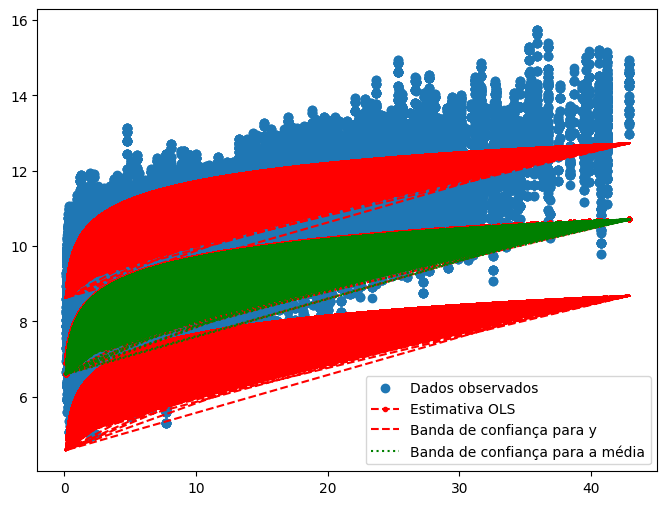

In [237]:
def esp_vs_obs(data=df_train):
    pred_ols = res.get_prediction()
    iv_l = pred_ols.summary_frame()["obs_ci_lower"]
    iv_u = pred_ols.summary_frame()["obs_ci_upper"]
    
    m_l = pred_ols.summary_frame()["mean_ci_lower"]
    m_u = pred_ols.summary_frame()["mean_ci_upper"]

    fig, ax = plt.subplots(figsize=(8, 6))

    ax.plot(data.tempo_emprego, data.renda_log, "o", label="Dados observados")
    #ax.plot(data.tempo_emprego, data.renda_log, "b-", label="Média da simulação")
    ax.plot(data.tempo_emprego, res.fittedvalues, "r--.", label="Estimativa OLS")
    ax.plot(data.tempo_emprego, iv_u, "r--", label = 'Banda de confiança para y')
    ax.plot(data.tempo_emprego, iv_l, "r--")
    ax.plot(data.tempo_emprego, m_u, "g:", label='Banda de confiança para a média')
    ax.plot(data.tempo_emprego, m_l, "g:")
    ax.legend(loc="best")
    plt.show

esp_vs_obs();

### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


### Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes.